# 生成數組的函數

## arange

`arange` 類似於**Python**中的 `range` 函數，只不過返回的不是列表，而是數組：

    arange(start, stop=None, step=1, dtype=None)

產生一個在區間 `[start, stop)` 之間，以 `step` 為間隔的數組，如果只輸入一個參數，則預設從 `0` 開始，並以這個值為結束：

In [1]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

與 `range` 不同， `arange` 允許非整數值輸入，產生一個非整型的數組：

In [2]:
np.arange(0, 2 * np.pi, np.pi / 4)

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714])

數組的類型預設由參數 `start, stop, step` 來確定，也可以指定：

In [3]:
np.arange(0, 2 * np.pi, np.pi / 4, dtype=np.float32)

array([ 0.        ,  0.78539819,  1.57079637,  2.3561945 ,  3.14159274,
        3.92699099,  4.71238899,  5.49778748], dtype=float32)

由於存在精度問題，使用浮點數可能出現問題：

In [4]:
np.arange(1.5, 2.1, 0.3)

array([ 1.5,  1.8,  2.1])

`stop` 的值 `2.1` 出現在了數組中，所以使用浮點數的時候需要注意。

## linspace

    linspace(start, stop, N)

產生 `N` 個等距分佈在 `[start, stop]`間的元素組成的數組，包括 `start, stop`。

In [5]:
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## logspace

    logspace(start, stop, N)

產生 N 個對數等距分佈的數組，預設以10為底：

In [6]:
np.logspace(0, 1, 5)

array([  1.        ,   1.77827941,   3.16227766,   5.62341325,  10.        ])

產生的值為$\left[10^0, 10^{0.25},10^{0.5},10^{0.75},10^1\right]$。

## meshgrid

有時候需要在二維平面中生成一個網格，這時候可以使用 `meshgrid` 來完成這樣的工作：

In [7]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks)

這裡產生的 `x, y`如下：

In [8]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [9]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

`x` 對應網格的第一維，`y` 對應網格的第二維。

圖例：

c:\Miniconda\lib\site-packages\IPython\kernel\__main__.py:9: RuntimeWarning: invalid value encountered in divide


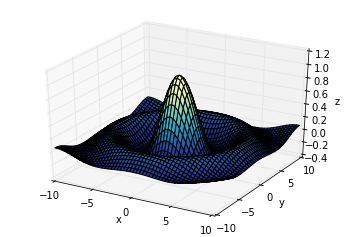

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函數
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

事實上，`x, y` 中有很多冗餘的元素，這裡提供了一個 `sparse` 的選項： 

In [11]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

In [12]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [13]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

在這個選項下，`x, y` 變成了單一的行向量和列向量。

但這並不影響結果：

c:\Miniconda\lib\site-packages\IPython\kernel\__main__.py:9: RuntimeWarning: invalid value encountered in divide


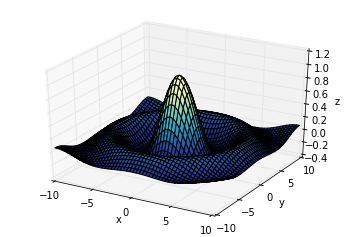

In [14]:
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

`meshgrid` 可以設置軸排列的先後順序：
- 預設為 `indexing='xy'` 即笛卡爾坐標，對於2維數組，返回行向量 `x` 和列向量 `y`
- 或者使用 `indexing='ij'` 即矩陣坐標，對於2維數組，返回列向量 `x` 和行向量 `y`。

## ogrid , mgrid

**Matlab**中有 `meshgrid` 的用法：

    meshgrid(-1:.5:1, -1:.5:1)

**Numpy**的 `meshgrid` 並不支持這樣的用法，但我們可以使用 `ogrid / mgrid` 來實現類似這樣的用法。

`ogrid` 與 `mgrid` 的區別在於：
- `ogrid` 相當於 `meshgrid(indexing='ij', sparse=True)`
- `mgrid` 相當於 `meshgrid(indexing='ij', sparse=False)`

In [15]:
x, y = np.ogrid[-1:1:.5, -1:1:.5]

In [16]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [17]:
y

array([[-1. , -0.5,  0. ,  0.5]])

注意：
- 這裡使用的是中括號
- **Matlab** 使用的是 `start:step:end` 的表示，**Numpy** 使用的是 `start:end:step` 的表示
- 這裡的結果不包括 `end` 的值

為了包含 `end` 的值，我們可以使用這樣的技巧：

In [18]:
x, y = np.ogrid[-1:1:5j, -1:1:5j]

In [19]:
x, y

(array([[-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ]]), array([[-1. , -0.5,  0. ,  0.5,  1. ]]))

我們在 `step` 的位置傳入一個複數 `5j` ，表示我們需要一個 `5` 個值的數組，此時返回值就會包含 `end` 的值。

重複之前的畫圖：

c:\Miniconda\lib\site-packages\IPython\kernel\__main__.py:9: RuntimeWarning: invalid value encountered in divide


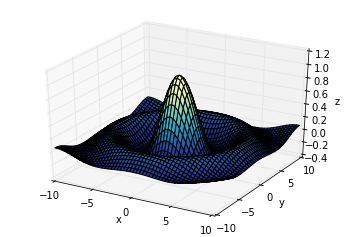

In [20]:
# exchange here
y, x = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

這裡，我們交換了 `x, y` 輸出值的順序。

## r`_` , c`_`

我們可以使用 `r_ / c_` 來產生行向量或者列向量。

使用切片產生：

In [21]:
np.r_[0:1:.1]

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

複數步長制定數組長度：

In [22]:
np.r_[0:1:5j]

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

連接多個序列，產生數組：

In [23]:
np.r_[(3,22,11), 4.0, [15, 6]]

array([  3.,  22.,  11.,   4.,  15.,   6.])

列向量：

In [24]:
np.c_[1:3:5j]

array([[ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ]])

## ones , zeros

```python
ones(shape, dtype=float64)
zeros(shape, dtype=float64)
```

產生一個制定形狀的全 `0` 或全 `1` 的數組，還可以制定數組類型：

In [25]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [26]:
np.ones([2,3], dtype=np.float32)

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

產生一個全是 `5` 的數組：

In [27]:
np.ones([2,3]) * 5

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

## empty

    empty(shape, dtype=float64, order='C')

也可以使用 `empty` 方法產生一個制定大小的數組（數組所指向的內存未被初始化，所以值隨機），再用 `fill` 方法填充：

In [28]:
a = np.empty(2)
a

array([-0.03412165,  0.05516321])

In [29]:
a.fill(5)
a

array([ 5.,  5.])

另一種替代方法使用索引，不過速度會稍微慢一些：

In [30]:
a[:] = 5
a

array([ 5.,  5.])

## empty`_`like, ones`_`like, zeros`_`like

    empty_like(a)
    ones_like(a)
    zeros_like(a)

產生一個跟 `a` 大小一樣，類型一樣的對應數組。

In [31]:
a = np.arange(0, 10, 2.5)
a

array([ 0. ,  2.5,  5. ,  7.5])

In [32]:
np.empty_like(a)

array([ 0.,  0.,  0.,  0.])

In [33]:
np.zeros_like(a)

array([ 0.,  0.,  0.,  0.])

In [34]:
np.ones_like(a)

array([ 1.,  1.,  1.,  1.])

## identity

    indentity(n, dtype=float64)
產生一個 `n` 乘 `n` 的單位矩陣：

In [35]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])